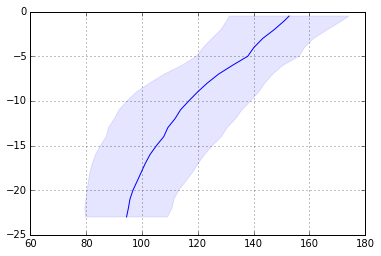

In [5]:
# coding: utf-8
# (c) 2015 Teruhisa Okada

% matplotlib inline

import matplotlib.pyplot as plt
from mpltools import special
import pandas as pd
import romspy

csvfile = 'F:/okada/Data/wq_3_2012_08.csv'

#df = pd.read_csv(csvfile)
df = pd.read_csv(csvfile, encoding='shift_JIS', na_values='*')
df.columns = ['station','datetime','layer','depth','bottom','temp','salt','light','DOp','turbidity','chlorophyll']
bottom = df.bottom
del df['bottom']
df = df.dropna()
df['DOsat'] = romspy.DOsat_g(df.temp, df.salt)
df['DOsat_mol'] = romspy.DOsat_mol(df.temp, df.salt)
df['DO'] = df.DOp / 100.0 * df.DOsat
df['DO_mol'] = df.DOp / 100.0 * df.DOsat_mol

def plot(vname):
    var = df.groupby('layer')[vname]
    mean = var.mean()
    std = var.std()
    special.errorfill(mean, -mean.index, xerr=std, alpha_fill=0.1)
    plt.grid()
    
#plot('DO')
#plt.xlim(0, 10)
plot('DO_mol')

In [7]:
# coding: utf-8
# (c) 2015 Teruhisa Okada

% matplotlib inline

import matplotlib.pyplot as plt
from mpltools import special
import pandas as pd
import romspy

csvfile = 'F:/okada/Data/wq_3_2012_08.csv'

#df = pd.read_csv(csvfile)
df = pd.read_csv(csvfile, encoding='shift_JIS', na_values='*')
df.columns = ['station','datetime','layer','depth','bottom','temp','salt','light','DOp','turbidity','chlorophyll']
bottom = df.bottom
del df['bottom']
df = df.dropna()
df['DOsat'] = romspy.DOsat_g(df.temp, df.salt)
df['DOsat_mol'] = romspy.DOsat_mol(df.temp, df.salt)
df['DO'] = df.DOp / 100.0 * df.DOsat
df['DO_mol'] = df.DOp / 100.0 * df.DOsat_mol

def plot2(vname):
    dates = df.groupby('datetime')[vname].index
    var = df.groupby([['datetime'],['layer']])[vname]
    for date in dates:
        var = df[df.datetime==date]
        mean = var[t].mean()
        std = var[t].std()
        plt.plot(mean, -mean.index)
    plt.grid()
    
#plot('DO')
#plt.xlim(0, 10)
plot2('DO_mol')

AssertionError: Grouper and axis must be same length